<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instalações e importações

In [210]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [166]:
pip install statsforecast

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf
import statsmodels.api as sm
import yfinance as yf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import pandas as pd
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

#carregamento dos conjuntos

In [168]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunspot_data= pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [169]:
#lynx
lynx_data.head()

,year,value
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [170]:
lynx_data.tail()

,year,value
109,1930,662
110,1931,1000
111,1932,1590
112,1933,2657
113,1934,3396


In [171]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [172]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [173]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como índice
lynx_data.set_index("year", inplace=True)

# Se o índice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [174]:

# Ordenar os dados por data (boa prática)
lynx_data=lynx_data.sort_index()

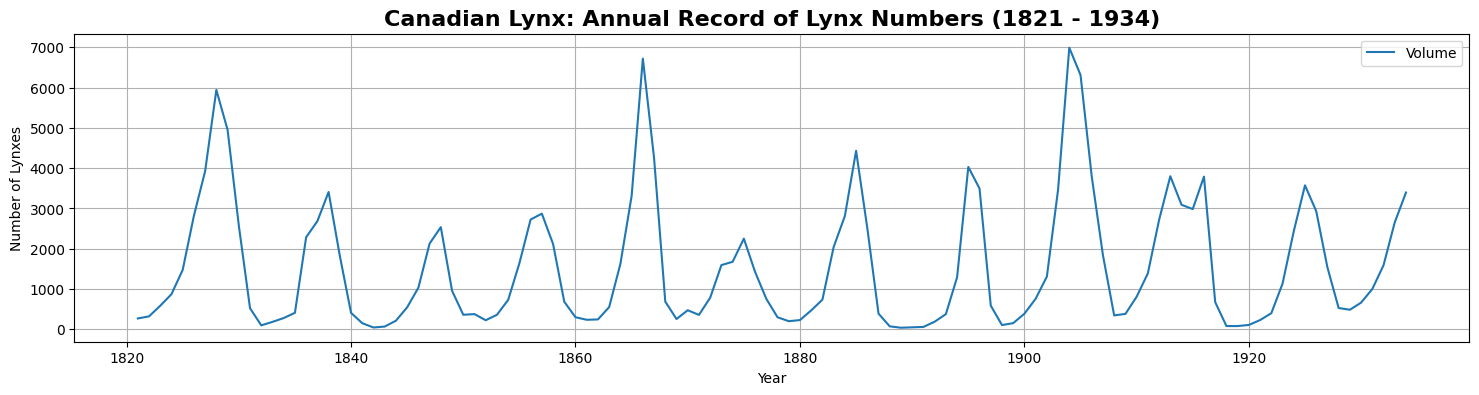

In [175]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='Volume') # Capitalized 'Volume' for consistency

plt.title("Canadian Lynx: Annual Record of Lynx Numbers (1821 - 1934)", fontsize=16, fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Lynxes") # More specific label
plt.grid(True)
plt.legend()
plt.show()

#sunspot_data data
##considered in this paper include the annual number ofsunspot from 1700 to 1987

In [176]:
#sunpot
print("primeiros anos registrados")
sunspot_data.head()

primeiros anos registrados


,year,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [177]:
print("ultimos anos registrados")
sunspot_data.tail()

ultimos anos registrados


,year,value
284,1984,45.9
285,1985,17.9
286,1986,13.4
287,1987,29.2
288,1988,100.2


In [178]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    289 non-null    int64  
 1   value   289 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [179]:
print(sunpot_data.index)
print(type(sunpot_data.index))

DatetimeIndex(['1700-01-01', '1701-01-01', '1702-01-01', '1703-01-01',
               '1704-01-01', '1705-01-01', '1706-01-01', '1707-01-01',
               '1708-01-01', '1709-01-01',
               ...
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01'],
              dtype='datetime64[ns]', name='year', length=289, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [180]:
# Converter a coluna 'year' para datetime no formato de ano
sunspot_data["year"] = pd.to_datetime(sunspot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como índice
sunspot_data.set_index("year", inplace=True)

# Garantir que o índice seja datetime (Timestamp), não Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
sunpot_data = sunpot_data.sort_index()


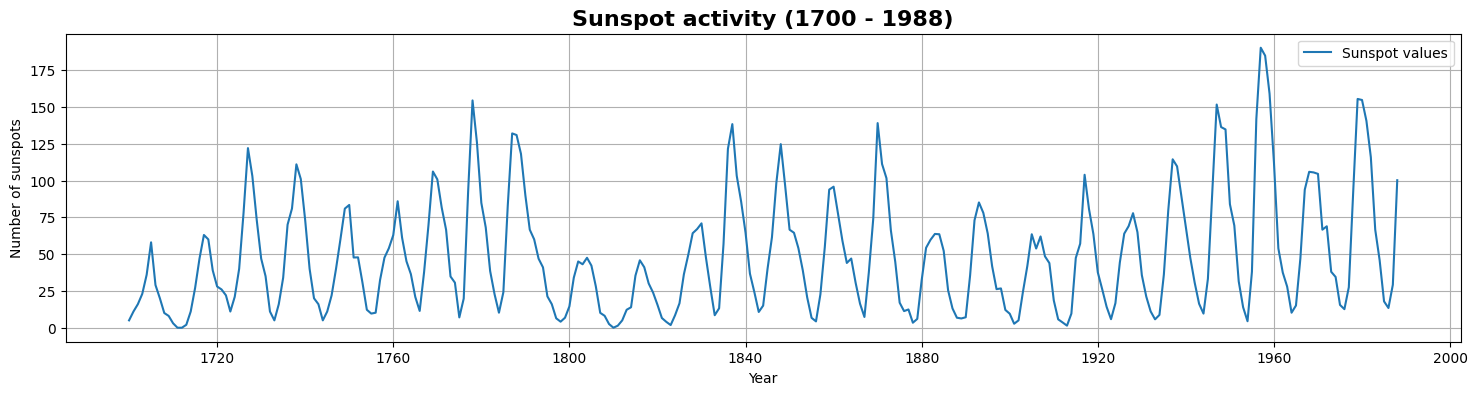

In [181]:
plt.figure(figsize=(18, 4)) # Create the first figure
plt.plot(sunpot_data.index, sunpot_data["value"], label='Sunspot values') # Plot sunspot data

# Correct title for the sunspot plot
plt.title("Sunspot activity (1700 - 1988)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of sunspots") # Corrected label
plt.grid(True)
plt.legend()
plt.show() # Display the first plot


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [182]:
exchange_data.head()

,observation_date,DEXUSUK
0,1980-01-05,2.2370
1,1980-01-12,2.2570
2,1980-01-19,2.2855
3,1980-01-26,2.2610
4,1980-02-02,2.2740


In [183]:

exchange_data.tail()

,observation_date,DEXUSUK
725,1993-11-27,1.4795
726,1993-12-04,1.4900
727,1993-12-11,1.4945
728,1993-12-18,1.4910
729,1993-12-25,1.5030


In [184]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  730 non-null    object 
 1   DEXUSUK           730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [185]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
exchange_data = exchange_data.sort_index()

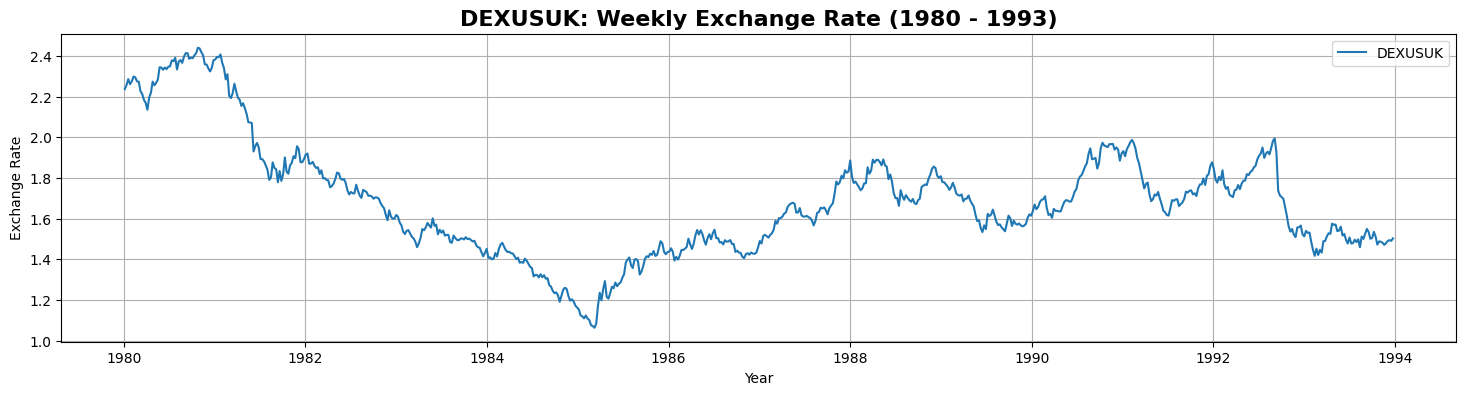

In [186]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index, exchange_data["DEXUSUK"], label='DEXUSUK') # Plot the actual data

plt.title("DEXUSUK: Weekly Exchange Rate (1980 - 1993)", fontsize=16, fontweight='bold') # Correct title placement
plt.xlabel("Year") # Appropriate label for time series
plt.ylabel("Exchange Rate") # Correct label for exchange rate
plt.grid(True)
plt.legend() # Show the label 'DEXUSUK'
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [187]:
nikkei225_data.tail()

,date,value
995,2010-03-26,10996.370117
996,2010-03-29,10986.469727
997,2010-03-30,11097.139648
998,2010-03-31,11089.940430
999,2010-04-01,11244.400391


In [188]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [189]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
nikkei225_data =nikkei225_data.sort_index()

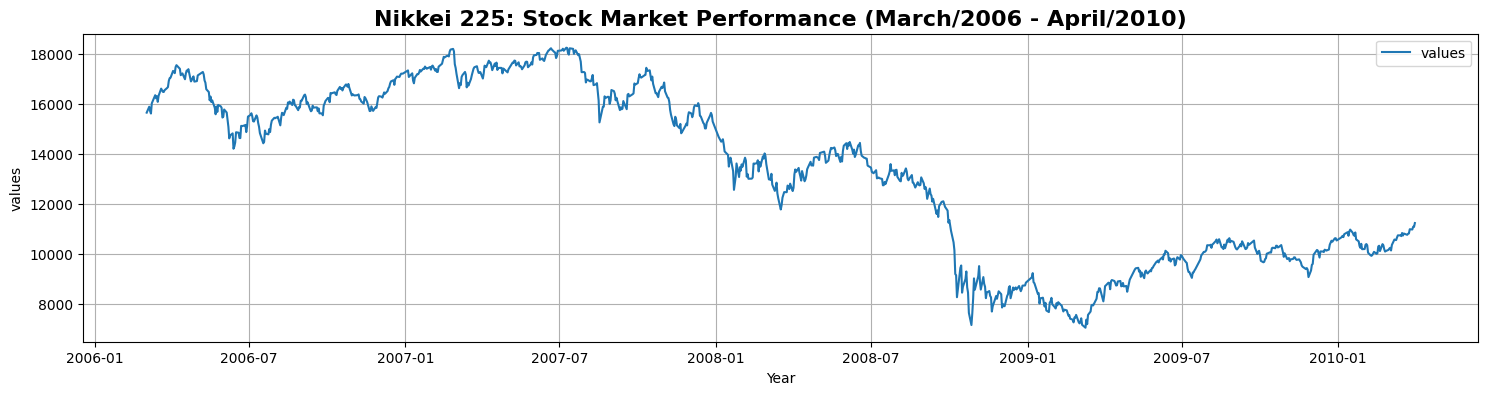

In [190]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index, nikkei225_data["value"], label='values')

# --- Here's the improved title setup ---
plt.title("Nikkei 225: Stock Market Performance (March/2006 - April/2010)", fontsize=16, fontweight='bold')
# --- End of improved title setup ---

plt.xlabel("Year") # Changed to "Ano" for Portuguese
plt.ylabel("values")
plt.grid(True)
plt.legend() # Don't forget to add legend if you have labels
plt.show()

#acf antes pacf

In [191]:
#need to be in ingles
def gerar_graficos_temporais(df, titulo):
    import pandas as pd
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt

    col = df.columns[0]
    serie = df[col].dropna()


    # Inferência da frequência
    freq = pd.infer_freq(df.index)
    print(f"[INFO] Plotando série: {col} — Frequência inferida: {freq}")

    # Escolha inteligente de reamostragem
    if freq in ['D', 'B', 'W', None]:
        serie_agg = serie.resample('ME').mean()
        agg_label = 'Média Mensal'
    elif freq in ['A', 'AS', 'Y']:
        serie_agg = serie.resample('2A').mean()
        agg_label = 'Média Bienal'
    elif freq in ['M', 'MS']:
        serie_agg = serie  # Já está em base mensal
        agg_label = 'Série Original (Mensal)'
    else:
        serie_agg = serie
        agg_label = 'Série Original'

    # Número seguro de defasagens
    lags = min(20, len(serie) // 2)

    # Gráficos
    plt.figure(figsize=(12, 10))

    # 1. Série original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. Série reamostrada
    plt.subplot(4, 1, 2)
    plt.plot(serie_agg, color='green')
    plt.title(f'{titulo} - {agg_label}')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(serie, lags=lags, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrelação (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(serie, lags=lags, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrelação Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


[INFO] Plotando série: value — Frequência inferida: YS-JAN


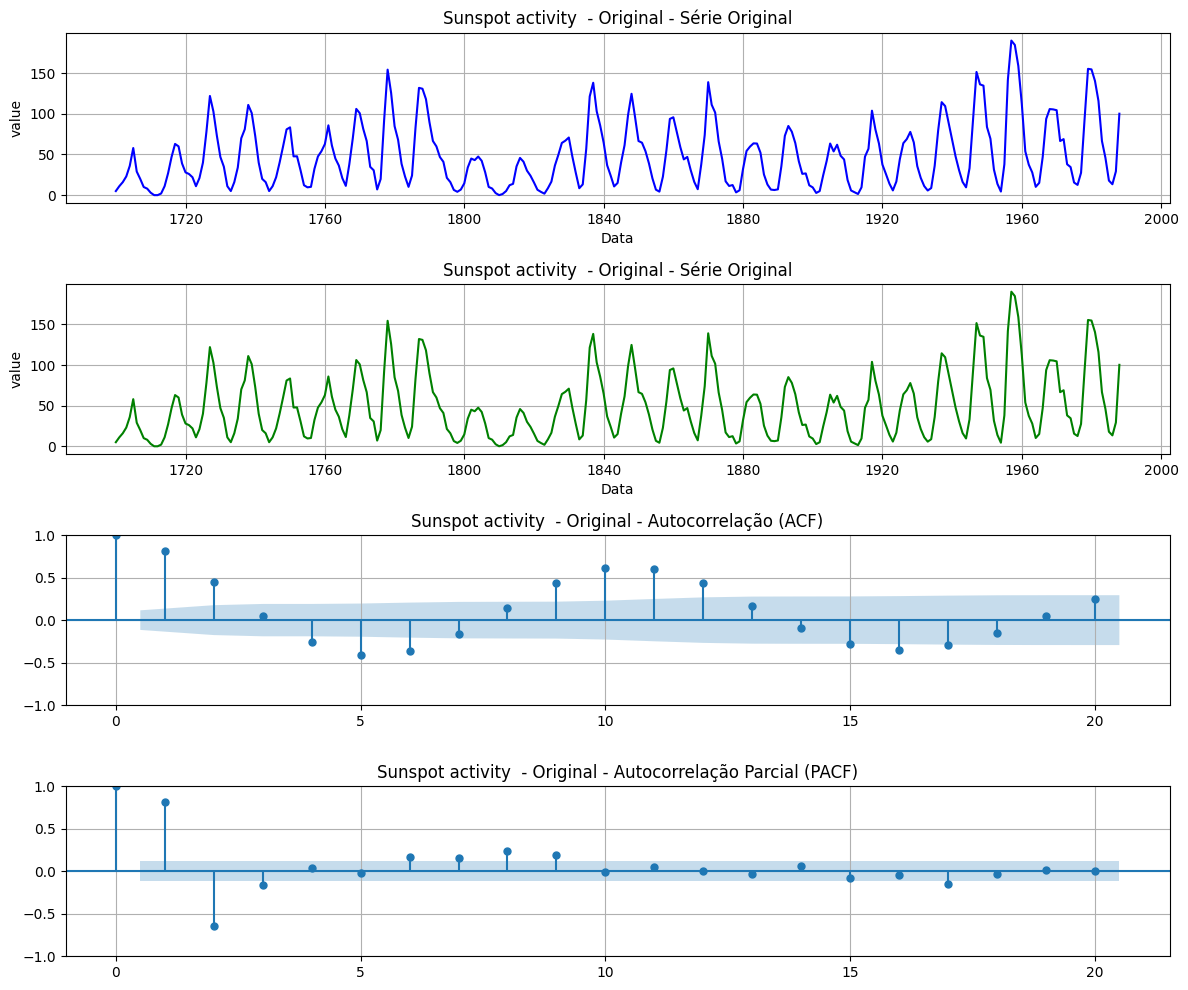

In [192]:
gerar_graficos_temporais(sunspot_data, "Sunspot activity  - Original")

[INFO] Plotando série: value — Frequência inferida: YS-JAN


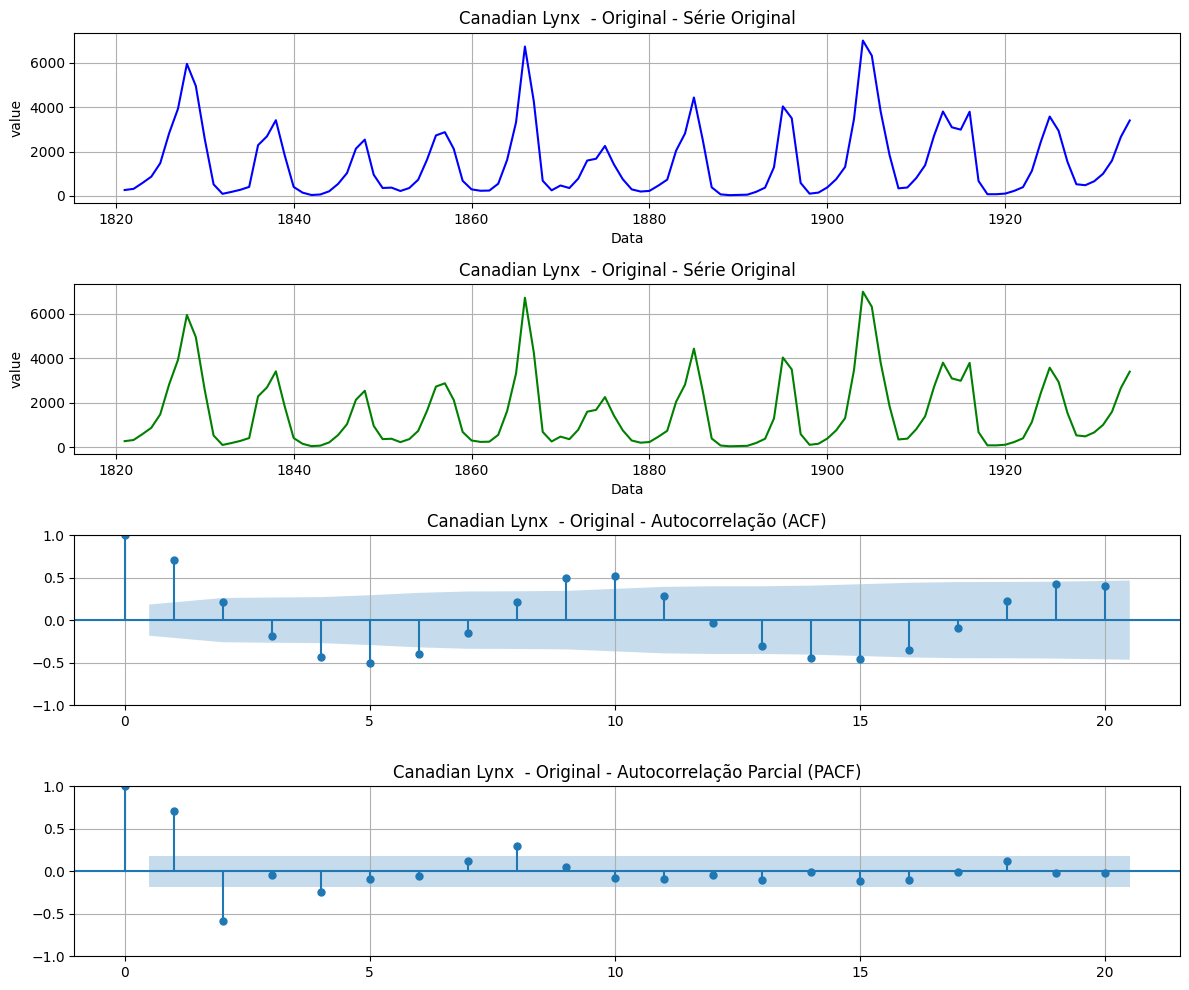

In [193]:
gerar_graficos_temporais(lynx_data, "Canadian Lynx  - Original")

[INFO] Plotando série: DEXUSUK — Frequência inferida: W-SAT


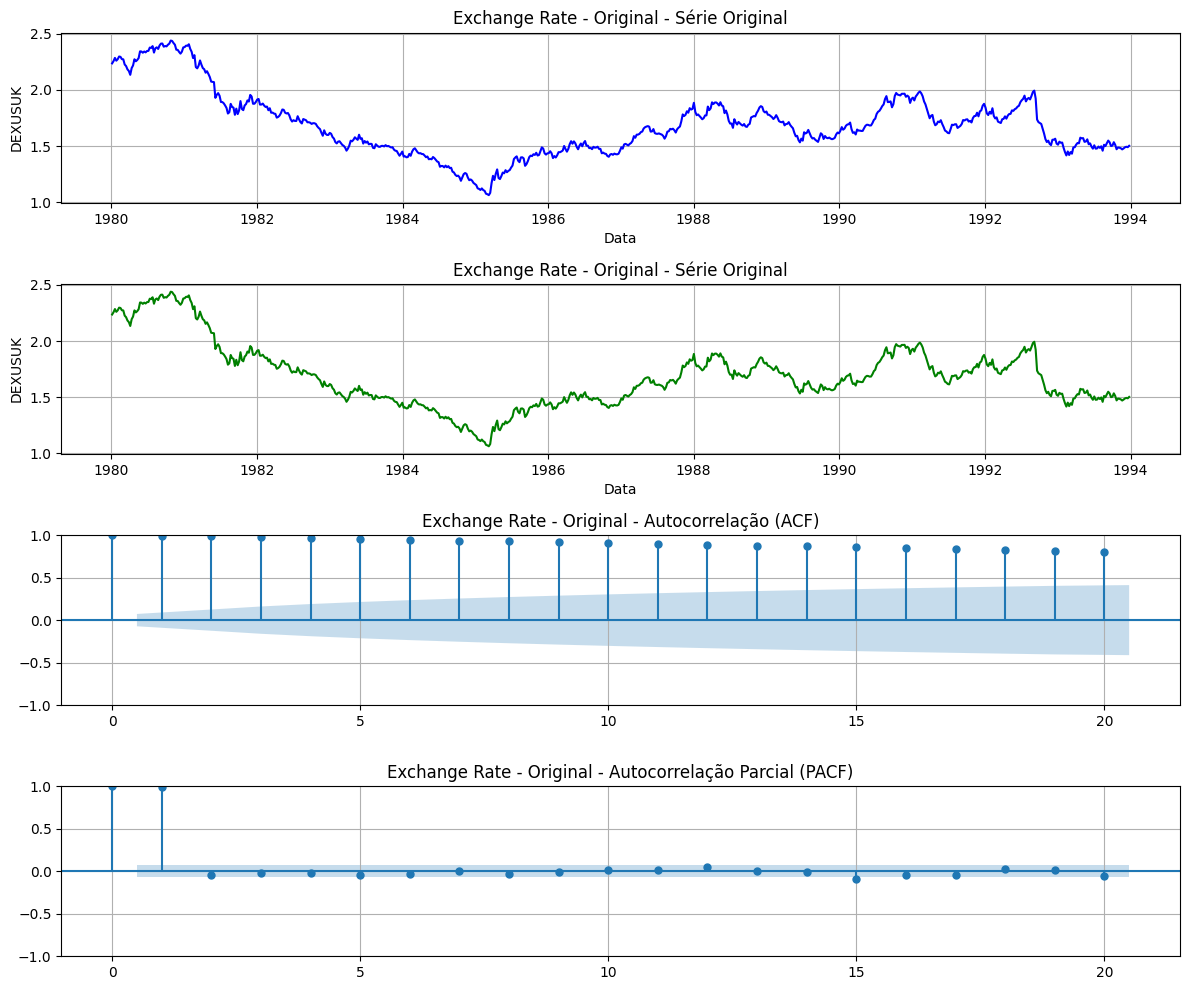

In [194]:
gerar_graficos_temporais(exchange_data, "Exchange Rate - Original")


[INFO] Plotando série: value — Frequência inferida: None


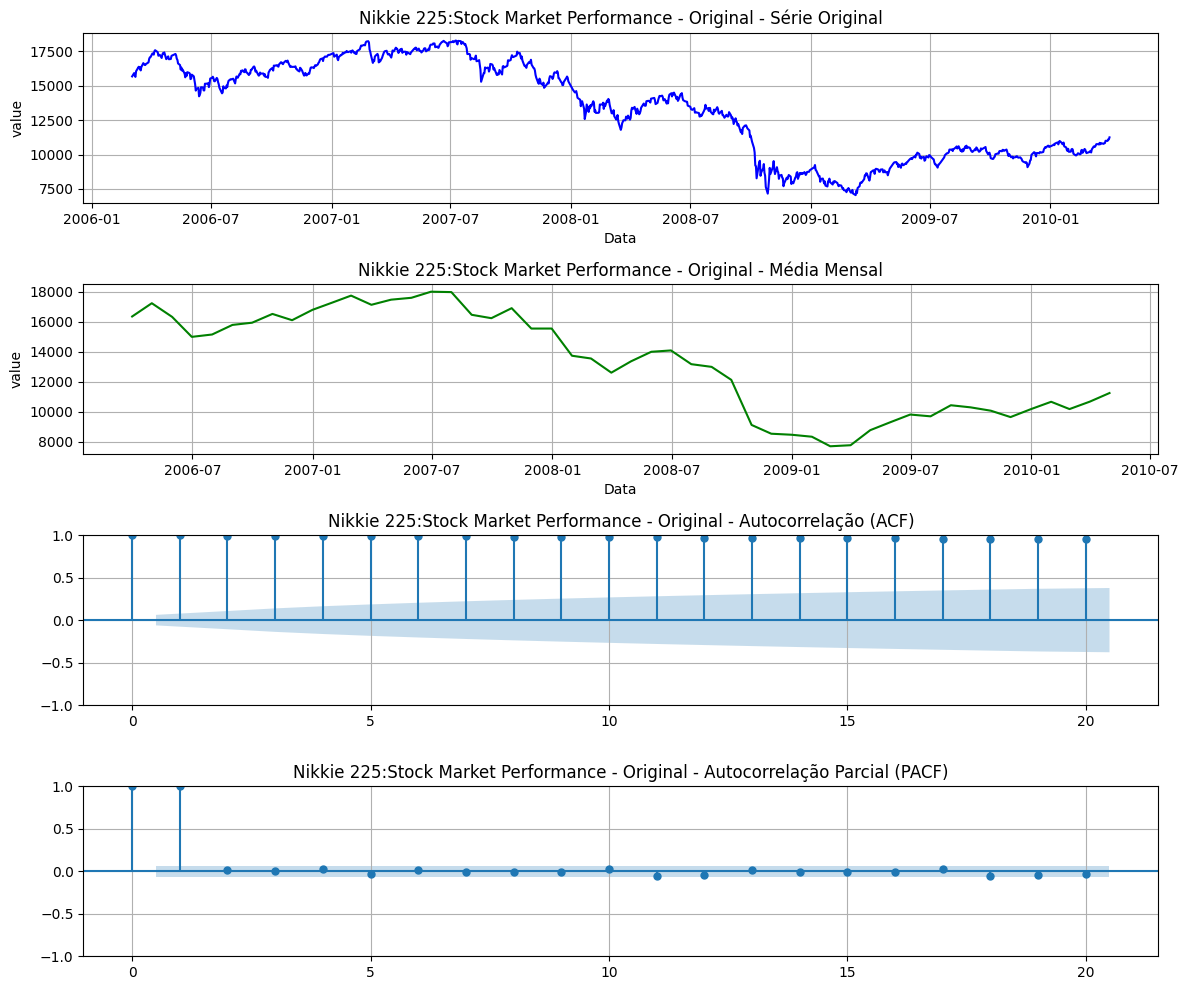

In [195]:
gerar_graficos_temporais(nikkei225_data, "Nikkie 225:Stock Market Performance - Original")

#decomposição


📊 Performing Seasonal Decomposition for 'Exchange Rate' (Column: DEXUSUK, Period: 7)


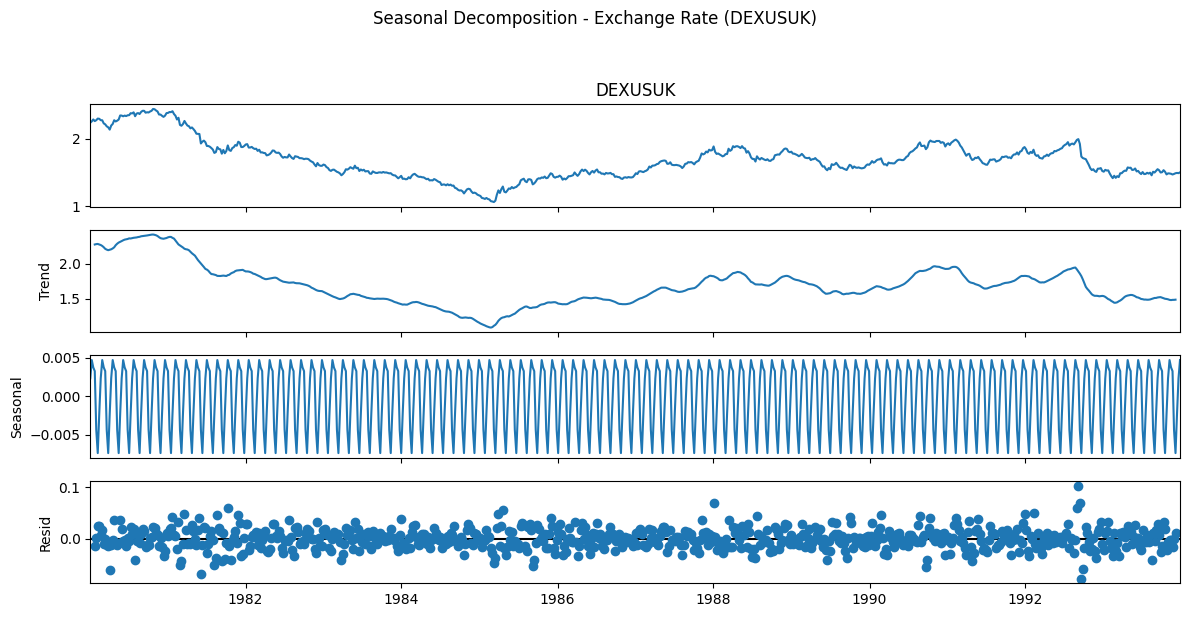


📊 Performing Seasonal Decomposition for 'Sunspot Activity' (Column: value, Period: 10)


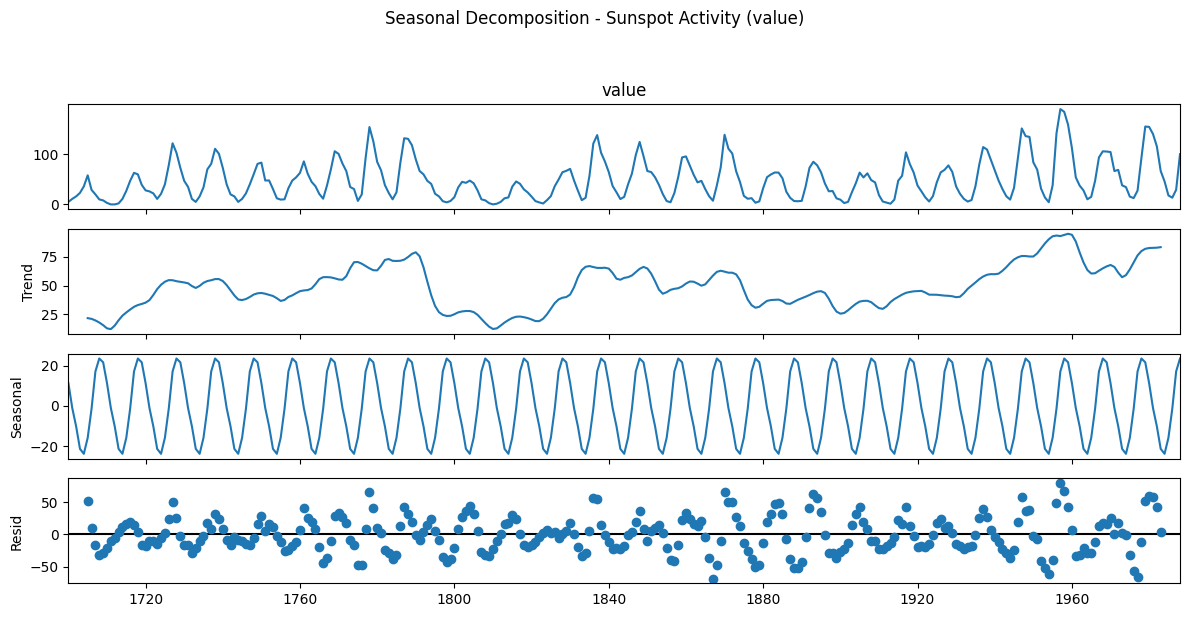


📊 Performing Seasonal Decomposition for 'Lynx Trappings' (Column: value, Period: 10)


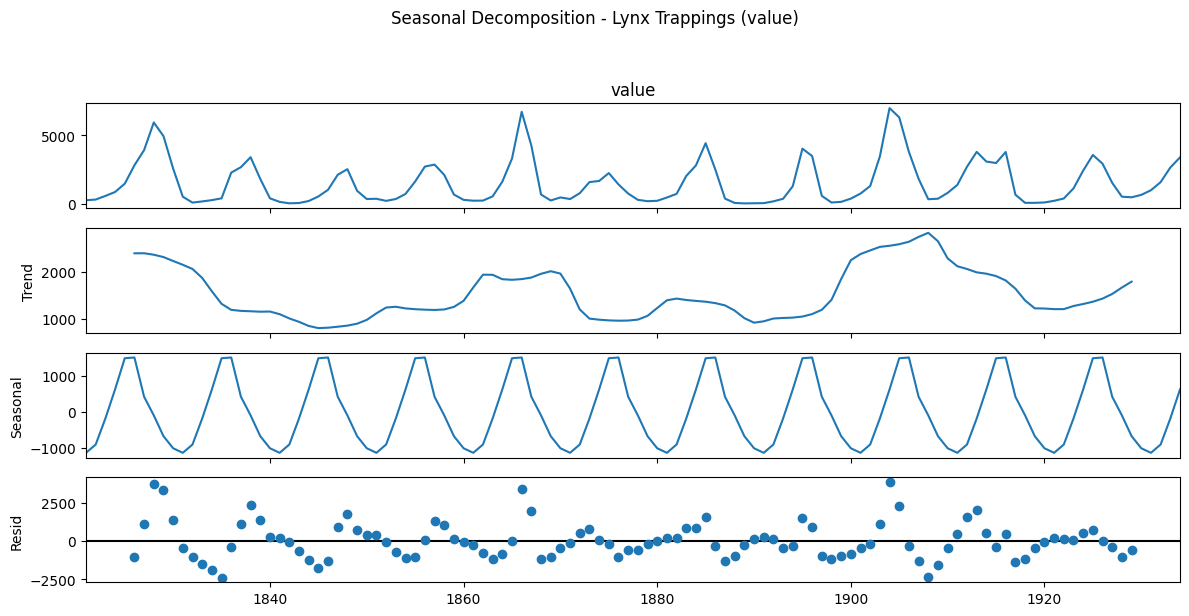


📊 Performing Seasonal Decomposition for 'Nikkei 225' (Column: value, Period: 365)


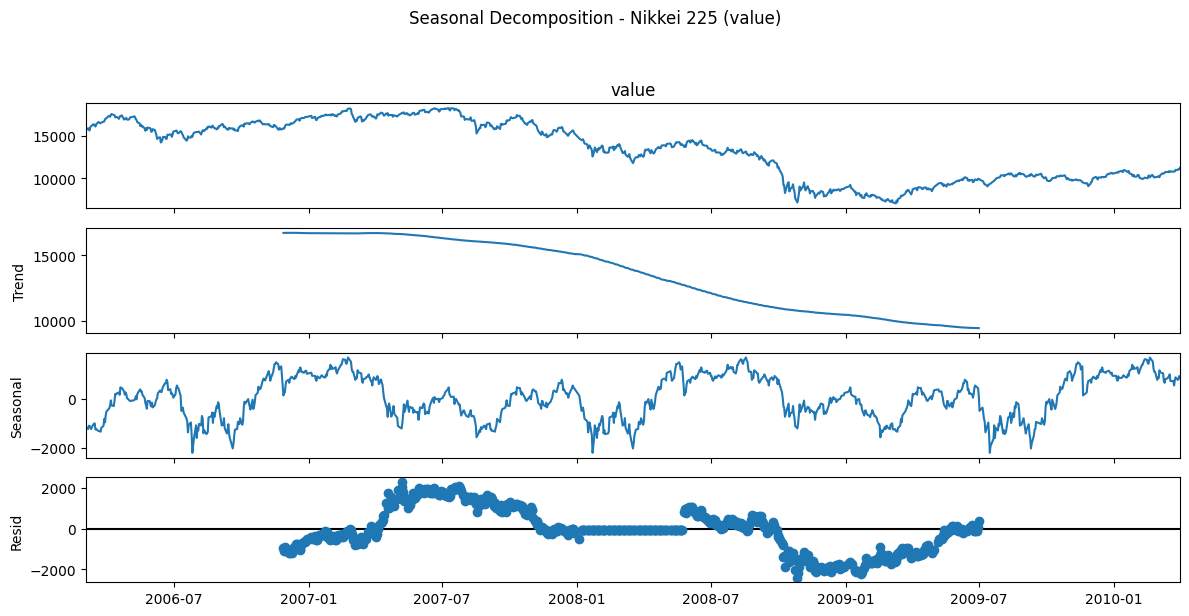

In [196]:
data_to_analyze = [
    # Weekly data, so a 7-day period (weekly cycle) is appropriate.
    {"name": "Exchange Rate", "df": exchange_data, "value_col": "DEXUSUK", "seasonal_period": 7},

    {"name": "Sunspot Activity", "df": sunpot_data, "value_col": "value", "seasonal_period": 10},

    {"name": "Lynx Trappings", "df": lynx_data, "value_col": "value", "seasonal_period": 10},

##The closing Nikkei 225 index (N225) data set covers daily stock#prices from 2006/03/03 to 2010/04/01
    # Daily data. Common periodicities are 5 (trading week), 7 (calendar week), or 365 (yearly).
    {"name": "Nikkei 225", "df": nikkei225_data, "value_col": "value", "seasonal_period": 365} # Trading week seasonality
]

# (Your `testar_season_decomp` function code remains the same as provided in your prompt)
def testar_season_decomp(data_configurations: list):
    """
    Performs seasonal decomposition for multiple time series and plots the components.

    Args:
        data_configurations (list): A list of dictionaries, where each dictionary should contain:
                                    - "name" (str): A descriptive name for the series.
                                    - "df" (pd.DataFrame): The DataFrame containing the time series.
                                    - "value_col" (str): The name of the column to analyze.
                                    - "seasonal_period" (int): The period of the seasonality
                                                               (e.g., 12 for monthly, 7 for weekly).
                                                               If None, decomposition is skipped for that series.
    """
    for config in data_configurations:
        name = config.get("name")
        df = config.get("df")
        value_col = config.get("value_col")
        period = config.get("seasonal_period")

        if not all([name, isinstance(df, pd.DataFrame), value_col]):
            print(f"Skipping invalid configuration: {config}. Missing name, DataFrame, or value_col.")
            continue

        if value_col not in df.columns:
            print(f"Error: Column '{value_col}' not found in DataFrame for '{name}'. Skipping.")
            continue

        serie = df[value_col].dropna()

        if period is None:
            print(f"\n🚫 Skipping seasonal decomposition for '{name}' (Column: {value_col}): No seasonal period specified.")
            continue

        # seasonal_decompose requires at least two full periods to work correctly
        if len(serie) < 2 * period:
            print(f"\n⚠️ Skipping seasonal decomposition for '{name}' (Column: {value_col}): Not enough data for period={period} (need at least {2*period} observations).")
            continue

        print(f"\n📊 Performing Seasonal Decomposition for '{name}' (Column: {value_col}, Period: {period})")

        try:
            # Model='additive' is suitable when seasonal fluctuations are roughly constant.
            # Model='multiplicative' is suitable when seasonal fluctuations grow/shrink with the level of the series.
            # Choose the model appropriate for your data.
            decomposicao = seasonal_decompose(serie, model='additive', period=period)

            # Plot the components
            fig = decomposicao.plot()
            fig.set_size_inches(12, 6) # Make the plot a bit larger for readability
            plt.suptitle(f"Seasonal Decomposition - {name} ({value_col})", y=1.02)
            plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
            plt.show()
        except Exception as e:
            print(f"An error occurred during decomposition for '{name}': {e}")

            # Define o nome do arquivo, combinando o nome da série e a coluna
            filename = f"decomposicao_{name.replace(' ', '_').replace('/', '_')}_{value_col}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como: {filename}")



# --- Call the function with your data ---
if __name__ == "__main__":
    testar_season_decomp(data_configurations=data_to_analyze)

#estacionalidade para todo os conjuntos


In [197]:
#need to chance to ingles
def tornar_estacionaria(df, nome="Série", max_diff=3):
    col_name = df.columns[0]
    current_serie = df[col_name].dropna().copy()
    differentiated_order = 0  # contador de quantas vezes foi diferenciada

    print(f"\n📊 Análise de Estacionaridade - {nome}")
    print(f"Coluna analisada: {col_name}")

    # --- Teste ADF na série original ---
    adf_result = adfuller(current_serie)
    print(f"\n🔍 Série Original:")
    print(f"  ADF Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Valores Críticos: {adf_result[4]}")

    if adf_result[1] < 0.05:
        print("  ✅ A série é estacionária. Nenhuma diferenciação necessária.")
        return df.loc[current_serie.index]  # retorna a série original (sem diferenciação)

    print("  ❌ A série NÃO é estacionária. Tentando diferenciações...")

    # --- Diferenciação sucessiva ---
    for d in range(1, max_diff + 1):
        if len(current_serie) > 1:
            current_serie = current_serie.diff().dropna()
        else:
            print(f"  ⚠️ Série muito curta para diferenciar após {d-1} diferenciações.")
            break

        if len(current_serie) == 0:
            print(f"  ⚠️ Série vazia após {d} diferenciações. Não é possível testar.")
            break

        adf_diff = adfuller(current_serie)
        print(f"\n🔁 Série Diferenciada ({d}ª ordem):")
        print(f"  ADF Statistic: {adf_diff[0]:.4f}")
        print(f"  p-value: {adf_diff[1]:.4f}")
        print(f"  Valores Críticos: {adf_diff[4]}")

        if adf_diff[1] < 0.05:
            print(f"  ✅ A série diferenciada ({d}ª ordem) é estacionária.")
            differentiated_order = d
            break
        else:
            print(f"  ❌ Ainda NÃO é estacionária.")

    # --- Informativo final ---
    if differentiated_order > 0:
        print(f"✔️ A série '{nome}' foi diferenciada {differentiated_order} vez(es).")
    else:
        print(f"⚠️ A série '{nome}' NÃO estacionarizou após {max_diff} diferenciações.")

    # --- Retorna o DataFrame atualizado com a série transformada ---
    return pd.DataFrame({col_name: current_serie})


In [198]:
exchange_data_est = tornar_estacionaria(exchange_data, "Exchange Rate")
sunspot_data_est = tornar_estacionaria(sunspot_data, "Sunspot")
lynx_data_est = tornar_estacionaria(lynx_data, "Lynx Trappings")
nikkei_data_est = tornar_estacionaria(nikkei225_data, "Nikkei 225")


📊 Análise de Estacionaridade - Exchange Rate
Coluna analisada: DEXUSUK

🔍 Série Original:
  ADF Statistic: -1.9903
  p-value: 0.2908
  Valores Críticos: {'1%': np.float64(-3.4393520240470554), '5%': np.float64(-2.8655128165959236), '10%': np.float64(-2.5688855736949163)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (1ª ordem):
  ADF Statistic: -26.1380
  p-value: 0.0000
  Valores Críticos: {'1%': np.float64(-3.4393644334758475), '5%': np.float64(-2.8655182850048306), '10%': np.float64(-2.568888486973192)}
  ✅ A série diferenciada (1ª ordem) é estacionária.
✔️ A série 'Exchange Rate' foi diferenciada 1 vez(es).

📊 Análise de Estacionaridade - Sunspot
Coluna analisada: value

🔍 Série Original:
  ADF Statistic: -2.3842
  p-value: 0.1462
  Valores Críticos: {'1%': np.float64(-3.453922368485787), '5%': np.float64(-2.871918329081633), '10%': np.float64(-2.5723001147959184)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (

#treinamento

In [199]:
#as series passam a ter menos 1 ponto sendo observado durante o treinamento <ajustar depois>
#treinamento da serie já estacionaria
train_sunspot_data = sunspot_data.loc['1701':'1920'] #76.66%
train_lynx_data = lynx_data.loc['1821':'1920']     #87.72%
train_exchange_data=exchange_data.loc['1980':'1992'] #92.86%}
train_nikkie225_data=nikkei225_data.loc['2006/03/06':'2009/06/05']#79.59%

test_sunspot_data = sunspot_data.loc['1921':'1987']#23.34%
test_lynx_data = lynx_data.loc['1921':'1934']#12.28%
test_exchange_data=exchange_data.loc['1993'] #7.14%
test_nikkie225_data=nikkei225_data.loc['2009/06/06':'2010/04/01']#20.41%

#validação

In [200]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_sunspot_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_sunspot_data = train_sunspot_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_sunspot_data = train_sunspot_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_sunspot_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_sunspot_data.index.min()}")
print(f"Fim do novo treino: {new_train_sunspot_data.index.max()}")
print(f"Início da validação: {validation_sunspot_data.index.min()}")
print(f"Fim da validação: {validation_sunspot_data.index.max()}")

Tamanho total do treino original: 220 pontos
Tamanho do conjunto de validação (10%): 22 pontos
Tamanho do novo conjunto de treinamento: 198 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1701-01-01 00:00:00
Fim do novo treino: 1898-01-01 00:00:00
Início da validação: 1899-01-01 00:00:00
Fim da validação: 1920-01-01 00:00:00


In [201]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_lynx_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_lynx_data = train_lynx_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_lynx_data = train_lynx_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_lynx_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_lynx_data.index.min()}")
print(f"Fim do novo treino: {new_train_lynx_data.index.max()}")
print(f"Início da validação: {validation_lynx_data.index.min()}")
print(f"Fim da validação: {validation_lynx_data.index.max()}")

Tamanho total do treino original: 100 pontos
Tamanho do conjunto de validação (10%): 10 pontos
Tamanho do novo conjunto de treinamento: 90 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1821-01-01 00:00:00
Fim do novo treino: 1910-01-01 00:00:00
Início da validação: 1911-01-01 00:00:00
Fim da validação: 1920-01-01 00:00:00


In [202]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_nikkie225_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_nikkie225_data = train_nikkie225_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_nikkie225_data = train_nikkie225_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_nikkie225_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_nikkie225_data.index.min()}")
print(f"Fim do novo treino: {new_train_nikkie225_data.index.max()}")
print(f"Início da validação: {validation_nikkie225_data.index.min()}")
print(f"Fim da validação: {validation_nikkie225_data.index.max()}")

Tamanho total do treino original: 799 pontos
Tamanho do conjunto de validação (10%): 79 pontos
Tamanho do novo conjunto de treinamento: 720 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 2006-03-06 00:00:00
Fim do novo treino: 2009-02-06 00:00:00
Início da validação: 2009-02-09 00:00:00
Fim da validação: 2009-06-05 00:00:00


In [203]:
# 1. Calcule o tamanho do conjunto de validação (10% do treino)
total_train_size = len(train_exchange_data)
validation_size = int(total_train_size * 0.10) # 10%

# Se a validação_size for 0, defina-a para 1 para garantir que haja pelo menos um ponto de validação
if validation_size == 0 and total_train_size > 0:
    validation_size = 1
elif total_train_size == 0: # Handle empty train set
    validation_size = 0

# 2. Separe o conjunto de validação da parte final do conjunto de treinamento
# A validação será os últimos 'validation_size' pontos do treino original
validation_exchange_data = train_exchange_data[-validation_size:]

# 3. O novo conjunto de treinamento será o restante dos dados (tudo, exceto a validação)
new_train_exchange_data = train_exchange_data[:-validation_size]

print(f"Tamanho total do treino original: {total_train_size} pontos")
print(f"Tamanho do conjunto de validação (10%): {validation_size} pontos")
print(f"Tamanho do novo conjunto de treinamento: {len(new_train_exchange_data)} pontos")

print("\nExemplo de índices (datas) para visualização:")
print(f"Início do novo treino: {new_train_exchange_data.index.min()}")
print(f"Fim do novo treino: {new_train_exchange_data.index.max()}")
print(f"Início da validação: {validation_exchange_data.index.min()}")
print(f"Fim da validação: {validation_exchange_data.index.max()}")

Tamanho total do treino original: 678 pontos
Tamanho do conjunto de validação (10%): 67 pontos
Tamanho do novo conjunto de treinamento: 611 pontos

Exemplo de índices (datas) para visualização:
Início do novo treino: 1980-01-05 00:00:00
Fim do novo treino: 1991-09-14 00:00:00
Início da validação: 1991-09-21 00:00:00
Fim da validação: 1992-12-26 00:00:00


In [204]:
new_train_lynx_data.tail()

,value
year,
1906-01-01,3794
1907-01-01,1836
1908-01-01,345
1909-01-01,382
1910-01-01,808


In [205]:
validation_lynx_data.head()

,value
year,
1911-01-01,1388
1912-01-01,2713
1913-01-01,3800
1914-01-01,3091
1915-01-01,2985


In [206]:
test_lynx_data

,value
year,
1921-01-01,229
1922-01-01,399
1923-01-01,1132
1924-01-01,2432
1925-01-01,3574
1926-01-01,2935
1927-01-01,1537
1928-01-01,529
1929-01-01,485


#arima model

In [219]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

def grid_search_arima_forecast(train_data, test_data, max_order=3, dataset_name="series"):
    """
    Realiza Grid Search para ARIMA no conjunto de treino, aplica o melhor modelo ao conjunto de teste,
    salva resultados e gera visualizações.

    Parâmetros:
        train_data (pd.Series): Série temporal de treino.
        test_data (pd.Series): Série temporal de teste.
        max_order (int): Valor máximo para p, d, q no ARIMA(p,d,q).
        dataset_name (str): Nome do dataset (usado nos arquivos CSV salvos).
    """

    p = d = q = range(0, max_order + 1)
    pdq_combinations = list(itertools.product(p, d, q))
    print(f"\n[{dataset_name.upper()}] Iniciando Grid Search com {len(pdq_combinations)} combinações...")

    results = []
    best_rmse = float("inf")
    best_order = None

    # Grid Search
    for order in pdq_combinations:
        try:
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test_data))
            rmse = np.sqrt(mean_squared_error(test_data, forecast))
            mae = mean_absolute_error(test_data, forecast)
            mse = mean_squared_error(test_data, forecast)

            results.append({
                "order": order,
                "rmse": rmse,
                "mae": mae,
                "mse": mse,
                "aic": model_fit.aic
            })

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order

            print(f"ARIMA{order} -> RMSE={rmse:.3f}, MAE={mae:.3f}, MSE={mse:.3f}, AIC={model_fit.aic:.2f}")

        except:
            continue

    print(f"\n[{dataset_name.upper()}] Melhor modelo: ARIMA{best_order} com RMSE={best_rmse:.3f}")
    results_df = pd.DataFrame(results).sort_values(by="rmse")
    results_df.to_csv(f"{dataset_name}_arima_grid_search_results.csv", index=False)

    # Forecast com melhor modelo
    final_model = ARIMA(train_data, order=best_order)
    final_model_fit = final_model.fit()
    forecast_test = final_model_fit.forecast(steps=len(test_data))
    forecast_test.index = test_data.index
    residuals = test_data - forecast_test

    # Avaliação
    print(f"\nMétricas no conjunto de teste:")
    print(f"  RMSE: {mean_squared_error(test_data, forecast_test, squared=False):.3f}")
    print(f"  MAE: {mean_absolute_error(test_data, forecast_test):.3f}")
    print(f"  MSE: {mean_squared_error(test_data, forecast_test):.3f}")

    # Exportação
    forecast_df = pd.DataFrame({
        "actual": test_data,
        "forecast": forecast_test,
        "residual": residuals
    })
    forecast_df.to_csv(f"{dataset_name}_arima_test_forecast.csv")

    print(f"\nArquivos salvos:")
    print(f" - {dataset_name}_arima_grid_search_results.csv")
    print(f" - {dataset_name}_arima_test_forecast.csv")

    # Visualização
    full_series = pd.concat([train_data, test_data])
    plt.figure(figsize=(12, 6))
    plt.plot(full_series, label="Série Original")
    plt.plot(forecast_test.index, forecast_test, label="Forecast (Teste)", linestyle="--", color="orange")
    plt.title(f"Forecast com ARIMA{best_order} - {dataset_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label="Resíduos (Teste)", color="red")
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Resíduos do Forecast")
    plt.grid(True)
    plt.legend()
    plt.show()


#

In [220]:
result = grid_search_arima_forecast(new_train_lynx_data,test_lynx_data,max_order=3, dataset_name="lynx")

# Visualizar os top 5 modelos
print(result['resultados_grid'].head())

# Plotar previsão x real
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(result['teste_real'].index, result['teste_real'], label='Real')
plt.plot(result['previsao_teste'].index, result['previsao_teste'], label='Previsão', linestyle='--')
plt.title(f"Forecast ARIMA{result['melhor_ordem']} no conjunto de teste")
plt.legend()
plt.grid(True)
plt.show()



[LYNX] Iniciando Grid Search com 64 combinações...
ARIMA(0, 0, 0) -> RMSE=1136.864, MAE=977.500, MSE=1292458.686, AIC=1592.15
ARIMA(0, 0, 1) -> RMSE=1120.075, MAE=960.707, MSE=1254567.151, AIC=1521.27
ARIMA(0, 0, 2) -> RMSE=1093.941, MAE=930.412, MSE=1196706.309, AIC=1496.59
ARIMA(0, 0, 3) -> RMSE=1110.789, MAE=949.233, MSE=1233851.847, AIC=1495.25
ARIMA(0, 1, 0) -> RMSE=1386.661, MAE=1051.214, MSE=1922829.929, AIC=1521.68
ARIMA(0, 1, 1) -> RMSE=1339.706, MAE=1027.188, MSE=1794813.163, AIC=1499.21
ARIMA(0, 1, 2) -> RMSE=1328.769, MAE=1021.063, MSE=1765628.255, AIC=1501.46
ARIMA(0, 1, 3) -> RMSE=1098.934, MAE=931.279, MSE=1207655.813, AIC=1483.70
ARIMA(0, 2, 0) -> RMSE=2969.123, MAE=2482.643, MSE=8815692.500, AIC=1522.42
ARIMA(0, 2, 1) -> RMSE=1346.380, MAE=1026.189, MSE=1812739.907, AIC=1511.31
ARIMA(0, 2, 2) -> RMSE=1300.100, MAE=1000.833, MSE=1690260.410, AIC=1488.64
ARIMA(0, 2, 3) -> RMSE=1286.852, MAE=994.108, MSE=1655989.031, AIC=1490.53
ARIMA(0, 3, 0) -> RMSE=22915.507, MAE=1795

TypeError: got an unexpected keyword argument 'squared'

In [216]:
import pandas as pd

def salvar_resultados(nome_modelo, y_real, y_previsto, residuos, caminho='resultados'):
    import os
    os.makedirs(caminho, exist_ok=True)

    df_resultado = pd.DataFrame({
        'y_real': y_real,
        'y_previsto': y_previsto,
        'residuo': residuos
    })
    df_resultado.to_csv(f"{caminho}/resultados_{nome_modelo}.csv", index=False)
    print(f"📁 Resultados salvos: {caminho}/resultados_{nome_modelo}.csv")

#normalização dos residuos

In [ ]:
inter_min = 0
inter_max = 1

scaler_sunspot = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_lynx = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_exchangerate = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_nikkie225 = MinMaxScaler(feature_range=(inter_min, inter_max))

train_sunspot_data_normalized = scaler_sunspot.fit_transform(residual_sunport_data

#janelamento do residuo

In [ ]:
def create_sliding_windows(series, window_size):

    list_of_sliding_windows = []
    # Ensure series_values is 1D for slicing, if it came from a column vector
    series_values = series.flatten() if series.ndim > 1 else series

    # If series is too short to even form one window + target
    if len(series_values) < window_size + 1:
        return np.empty((0, window_size + 1)) # Return empty array with correct number of columns

    # Number of possible windows to create
    list_size_to_iterate = len(series_values) - window_size

    for i in range(list_size_to_iterate): # Loop from 0 up to (length - window_size - 1)
        # Each window includes 'window_size' input features and 1 target (window_size + 1 total)
        window = series_values[i : i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows)

#seleção de lag do residuo

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg # Make sure to install statsmodels: pip install statsmodels

# --- Configuration for Lag Selection GA ---
MAX_LAG = 30         # The maximum possible lag order to consider (N_GENES for the binary string)
POP_SIZE = 100       # Population size
MUTATION_RATE = 0.05 # Probability of a bit flipping
NUM_GENERATIONS = 200 # Number of generations to run the GA

# --- Dummy Time Series Data for Demonstration ---
# In a real application, you MUST replace this with your actual time series data.
# This dummy data simulates a series with some autoregressive properties to make lag selection meaningful.
np.random.seed(42)
n_samples = 200


print(f"--- GA Setup for Lag Selection ---")
print(f"Time Series Data Length: {len(time_series_data)}")
print(f"Maximum Lag to Consider (MAX_LAG): {MAX_LAG}")
print(f"Population Size: {POP_SIZE}")
print(f"Mutation Rate: {MUTATION_RATE}")
print(f"Number of Generations: {NUM_GENERATIONS}\n")

# --- GA Core Functions (Adapted for Lag Selection) ---

def criar_populacao_inicial(tamanho_populacao, tamanho_individuo):
    """
    Cria uma população inicial de indivíduos (bitstrings aleatórias).
    Cada bit representa a inclusão (1) ou exclusão (0) de uma lag.
    """
    populacao = []
    for _ in range(tamanho_populacao):
        individuo = ''.join(random.choice(['0', '1']) for _ in range(tamanho_individuo))
        populacao.append(individuo)
    return populacao

def calcular_fitness_lag_selection(individuo_binary_string, time_series_data_local):
    """
    Calcula o fitness de um indivíduo para seleção de lags.
    O fitness é o AIC (Akaike Information Criterion) de um modelo AutoReg.
    Menor AIC indica melhor fitness (modelo mais parcimonioso e com bom ajuste).
    """
    selected_lags = []
    # Convert binary string to a list of selected lag orders (1-indexed)
    # If the bit at index 'i' is '1', then lag 'i+1' is selected.
    for i, bit in enumerate(individuo_binary_string):
        if bit == '1':
            selected_lags.append(i + 1) # Lag order is i+1

    # If no lags are selected, or if the number of selected lags is too high for the data,
    # assign a very high penalty (bad fitness).
    # Also, ensure at least one lag is selected for a meaningful AR model.
    if not selected_lags or len(time_series_data_local) <= max(selected_lags):
        return float('inf')

    # Sort lags for AutoReg model (statsmodels expects them sorted)
    selected_lags.sort()

    try:
        # Fit an AR model with the selected lags
        # 'trend=c' includes a constant (intercept) in the model.
        model = AutoReg(time_series_data_local, lags=selected_lags, trend='c')
        model_fit = model.fit()
        fitness = model_fit.aic
        return fitness
    except Exception as e:
        # Catch exceptions that might occur during model fitting (e.g., singular matrix).
        # Assign a very high penalty to individuals that lead to such errors.
        # print(f"Warning: Model fitting failed for lags {selected_lags}. Error: {e}") # For debugging
        return float('inf')

def selecionar_pais_roleta_minimization(populacao, fitness_func, time_series_data_local):
    """
    Seleciona pais para reprodução usando seleção por roleta,
    adaptada para problemas de minimização (menor fitness é melhor).
    """
    fitness_values = [fitness_func(individuo, time_series_data_local) for individuo in populacao]

    # Handle cases where all fitness values are infinity (no valid models found yet)
    if all(f == float('inf') for f in fitness_values):
        # Fallback to random selection if no valid individuals, to prevent stagnation
        return random.sample(populacao, len(populacao))

    # Invert fitness for minimization problem (lower AIC is better, higher probability)
    # Add a small constant to inverted fitness to avoid division by zero
    # The higher the inverse fitness, the higher the probability of selection.
    inverted_fitness = [
        (1 / (f + 1e-6)) if f != float('inf') else 0
        for f in fitness_values
    ]

    fitness_total = sum(inverted_fitness)

    if fitness_total == 0:
        # If all inverted fitness values are 0 (e.g., all models failed after penalty)
        return random.sample(populacao, len(populacao)) # Select randomly to introduce diversity

    probabilities = [f / fitness_total for f in inverted_fitness]

    pais = []
    # Select parents using roulette wheel based on probabilities
    # `k=len(populacao)` ensures we select enough parents for the next generation
    indices = np.random.choice(len(populacao), size=len(populacao), p=probabilities)
    pais = [populacao[i] for i in indices]
    return pais

def cruzar(pai1, pai2):
    """Realiza o crossover de um ponto entre dois pais (bitstrings)."""
    # Ensure point is within bounds, avoiding cutting at the very beginning or end
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

def mutar(individuo, taxa_mutacao):
    """Aplica mutação a um indivíduo (troca um bit com probabilidade taxa_mutacao)."""
    novo_individuo = ''
    for bit in individuo:
        if random.random() < taxa_mutacao:
            # Flip the bit
            bit_mutado = '1' if bit == '0' else '0'
            novo_individuo = novo_individuo + bit_mutado
        else:
            novo_individuo += bit
    return novo_individuo

def algoritmo_genetico_lag_selection(tamanho_populacao, tamanho_individuo, taxa_mutacao, num_geracoes, time_series_data_input):
    """
    Implementa o Algoritmo Genético para a seleção de lags ótimos
    para um modelo de série temporal (usando AIC como fitness).
    """
    populacao = criar_populacao_inicial(tamanho_populacao, tamanho_individuo)
    melhores_fit_ger = [] # Stores the best fitness found in each generation

    # Initial evaluation to get the best fitness before the loop starts (optional but good for tracking)
    initial_fitness_values = [calcular_fitness_lag_selection(ind, time_series_data_input) for ind in populacao]
    melhores_fit_ger.append(min(initial_fitness_values))


    for geracao in tqdm(range(num_geracoes), desc="GA Generations"):
        # Avaliação de toda a população
        fitness_populacao = [calcular_fitness_lag_selection(individuo, time_series_data_input) for individuo in populacao]

        # Encontra o melhor fitness desta geração (para acompanhamento da convergência)
        current_best_fitness = min(fitness_populacao)
        melhores_fit_ger.append(current_best_fitness)

        # Seleção dos pais
        pais = selecionar_pais_roleta_minimization(populacao, calcular_fitness_lag_selection, time_series_data_input)

        # Geração da nova população através de Crossover e Mutação
        nova_populacao = []
        # Ensure we generate enough offspring to fill the next population
        for i in range(0, len(pais), 2):
            # If there's an odd number of parents, the last one might be skipped,
            # or you can handle it by just adding the last parent as-is or cloning.
            # Here, we ensure we always have pairs for crossover.
            if i + 1 < len(pais):
                filho1, filho2 = cruzar(pais[i], pais[i + 1])
                # Mutate children immediately after crossover
                nova_populacao.extend([mutar(filho1, taxa_mutacao), mutar(filho2, taxa_mutacao)])
            else:
                # If there's an odd parent, add it (mutated) to ensure population size is maintained
                nova_populacao.append(mutar(pais[i], taxa_mutacao))


        # Ensure the population size remains constant
        # If nova_populacao is larger, truncate it; if smaller, fill with random individuals (less ideal but works)
        if len(nova_populacao) > tamanho_populacao:
            populacao = nova_populacao[:tamanho_populacao]
        elif len(nova_populacao) < tamanho_populacao:
            # This case shouldn't ideally happen if selection and crossover are done correctly
            # but as a safeguard, fill with new random individuals.
            fill_count = tamanho_populacao - len(nova_populacao)
            populacao = nova_populacao + criar_populacao_inicial(fill_count, tamanho_individuo)
        else:
            populacao = nova_populacao

    # Após todas as gerações, encontra o melhor indivíduo na população final
    melhor_individuo = min(populacao, key=lambda ind: calcular_fitness_lag_selection(ind, time_series_data_input))
    melhor_fitness = calcular_fitness_lag_selection(melhor_individuo, time_series_data_input)

    return melhor_individuo, melhor_fitness, melhores_fit_ger

# --- Main Execution ---
if __name__ == "__main__":
    # Execute the GA for Lag Selection
    best_lag_individual, best_lag_fitness, historical_fitness = algoritmo_genetico_lag_selection(
        POP_SIZE, MAX_LAG, MUTATION_RATE, NUM_GENERATIONS, time_series_data
    )

    print("\n--- GA Results for Lag Selection ---")
    print(f"Best Individual (Binary Lags String): {best_lag_individual}")
max
    # Convert the binary string to a list of 1-indexed selected lags
    selected_lags = [i + 1 for i, bit in enumerate(best_lag_individual) if bit == '1']
    selected_lags.sort() # Ensure lags are sorted for consistent output
    print(f"Selected Lags (1-indexed): {selected_lags}")
    print(f"Best Fitness (AIC): {best_lag_fitness:.4f}")

    # Optional: Plotting the convergence of the best fitness
    plt.figure(figsize=(10, 6))
    plt.plot(historical_fitness)
    plt.title('Convergence of Best Fitness (AIC) over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best AIC')
    plt.grid(True)
    plt.yscale('log') # Use log scale for AIC often makes convergence clearer
    plt.show()

    # You can now use `selected_lags` to train your final AR model
    # Example:
    try:
        if selected_lags:
            final_model = AutoReg(time_series_data, lags=selected_lags, trend='c')
            final_model_fit = final_model.fit()
            print("\n--- Final Model Summary with Selected Lags ---")
            print(final_model_fit.summary())
        else:
            print("\nNo lags were selected by the GA for the best individual. Cannot build a final AR model.")
    except Exception as e:
        print(f"\nError building final model with selected lags: {e}")

#MLP

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):

    neuronios = [5, 10,25]
    func_activation = [ 'tanh','logistic', 'relu']
    alg_treinamento = ['lbfgs', 'sgd', 'adam']

    max_iteracoes = [5000, 10000, 20000]  # Tente valores maiore
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    """para otimizar o código reduzindo os laços utilize o itertools:

    import itertools
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))
    for i, j, l, m, n in hyper_param:

    """

    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):

                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)

                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                print('func: ', func_activation[j])





    return select_model

#SVM

#LSTM


# SALVAR TODOS OS CONJUNTOS PROCESSADOS PARA CADA DATASET


In [ ]:
import os
# Definindo o diretório onde os arquivos serão salvos
output_dir = "processed_time_series_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado.")

print("\n--- Salvando todos os conjuntos processados para cada dataset ---")

for name, data_sets in processed_data.items():
    file_path = os.path.join(output_dir, f"{name}_sets.npz")
    np.savez_compressed(
        file_path,
        X_train=data_sets["X_train"],
        y_train=data_sets["y_train"],
        X_val=data_sets["X_val"],
        y_val=data_sets["y_val"],
        X_test=data_sets["X_test"],
        y_test=data_sets["y_test"]
    )
    print(f"'{name}_sets.npz' salvo com sucesso em '{output_dir}'.")

print("\nTodos os conjuntos foram salvos!")

#ajuda ajuda alguem me ajuda

In [ ]:
# Referências para Modelagem de Séries Temporais



#https://otexts.com/fpppy/nbs/02-graphics.html
#https://www.tylervigen.com/spurious-correlations

#https://www.ibm.com/br-pt/think/topics/autocorrelation
#https://www.linkedin.com/pulse/como-realizar-uma-an%C3%A1lise-de-correla%C3%A7%C3%A3o-em-s%C3%A9ries-r-oliveira-batista/
#https://otexts.com/fpppg/acf.html




## ARIMA / SARIMA

- [GitHub: ARIMA model time series prediction (Python)](https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python)
- [YouTube: ARIMA Time Series Tutorial](https://www.youtube.com/watch?v=Rl_tMSc_wKo)
- [Medium: Time Series Forecasting with ARIMA, SARIMA and SARIMAX](https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
- [Towards Data Science: Understanding ARIMA Time Series Modeling](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/)
- [Towards Data Science: Time Series Forecasting using Auto-ARIMA in Python](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)
- [Medium: Estimating ARIMA and SARIMA coefficients using Genetic Algorithm](https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589)
- [Kaggle Discussions: ARIMA Questions and Answers](https://www.kaggle.com/discussions/questions-and-answers/199346)
- [DataCamp Tutorial: ARIMA](https://www.datacamp.com/tutorial/arima)
- [Medium: ARIMA Model from Scratch in Python](https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce)

## Artigos Científicos e Modelos Híbridos

- [arXiv Paper (2025): Time Series Forecasting with Large Language Models](https://arxiv.org/pdf/2504.08940)
- [Neurocomputing Paper: Hybrid Forecasting Models](https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf)
- [GitHub: Additive Hybrid Model with MLP](https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb)

## Séries Temporais e Pandas

- [Towards Data Science: Introducing Time Series in Pandas (Parte 1)](https://towardsdatascience.com/introducing-time-series-in-pandas-09c7cab569b4/)
- [Pandas Docs: Time Series Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## Redes Neurais para Séries Temporais (MLP, LSTM, GRU)

- [Towards Data Science: Neural Network MLP for Time Series Forecasting in Practice](https://towardsdatascience.com/neural-network-mlp-for-time-series-forecasting-in-practice-04c47c1e3711/)
- [Towards Data Science: Exploring the LSTM Neural Network Model for Time Series](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf/)
- [Gabe Nosek: Time Series Stock Prediction with LSTM](https://gabenosek.medium.com/time-series-stock-prediction-with-lstm-eb04f2224c22)
- [Medium: Time Series Prediction with LSTM, Bi-LSTM, GRU](https://medium.com/data-science-data-engineering/time-series-prediction-lstm-bi-lstm-gru-99334fc16d75)
- [Towards Data Science: Time Series ARIMA vs SARIMA vs LSTM - Hands-on Tutorial](https://towardsdatascience.com/time-series-arima-vs-sarima-vs-lstm-hands-on-tutorial-bd5630298da3/)
- [Towards Data Science: Hands-on Neural Networks and Time Series with Python](https://towardsdatascience.com/hands-on-neural-networks-and-time-series-with-python-a61d7d75f3d9/)
- [Medium (Português): Introdução às Redes LSTM - Prevendo valor de ações na bolsa](https://medium.com/datarisk-io/introdu%C3%A7%C3%A3o-%C3%A0s-redes-lstm-prevendo-valor-de-a%C3%A7%C3%B5es-na-bolsa-df270ca0cee5)
- [Towards Data Science: LSTM Framework for Univariate Time Series Prediction](https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e/)
- [Mario Filho: Como prever séries temporais com LSTM em Python (tutorial em Português)](https://mariofilho.com/como-prever-series-temporais-com-lstm-em-python/)
- [Medium: Understanding LSTMs - LSTM Implementation from Scratch](https://medium.com/@samina.amin/understanding-lstms-lstm-implementation-from-scratch-18965a150eca)
- [Medium: Building a Neural Network Zoo from Scratch - The Long Short-Term Memory Network](https://medium.com/@CallMeTwitch/building-a-neural-network-zoo-from-scratch-the-long-short-term-memory-network-1cec5cf31b7)
- [Kaggle: LSTM Neural Network from Scratch](https://www.kaggle.com/code/navjindervirdee/lstm-neural-network-from-scratch)

## Técnicas Auxiliares e Outros Temas em Séries Temporais

- [Towards Data Science: Fourier Transform for Time Series Plotting & Complex Numbers](https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/)
- [Towards Data Science: 3 Common Time Series Modeling Mistakes You Should Know](https://towardsdatascience.com/3-common-time-series-modeling-mistakes-you-should-know-a126df24256f/)
